In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
data=pd.read_csv(r"C:\Users\dell\Downloads\bank-full (1).csv", sep=";")

In [3]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
data.shape

(45211, 17)

In [7]:
data=data.dropna()
data.shape

(45211, 17)

In [9]:
data[data.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [10]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

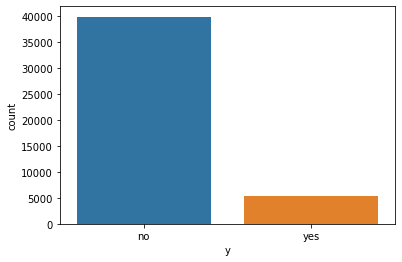

In [11]:
sns.countplot(x="y",data=data)

In [12]:
data1=data[data["y"]=="yes"]
data2=data[data["y"]=="no"]

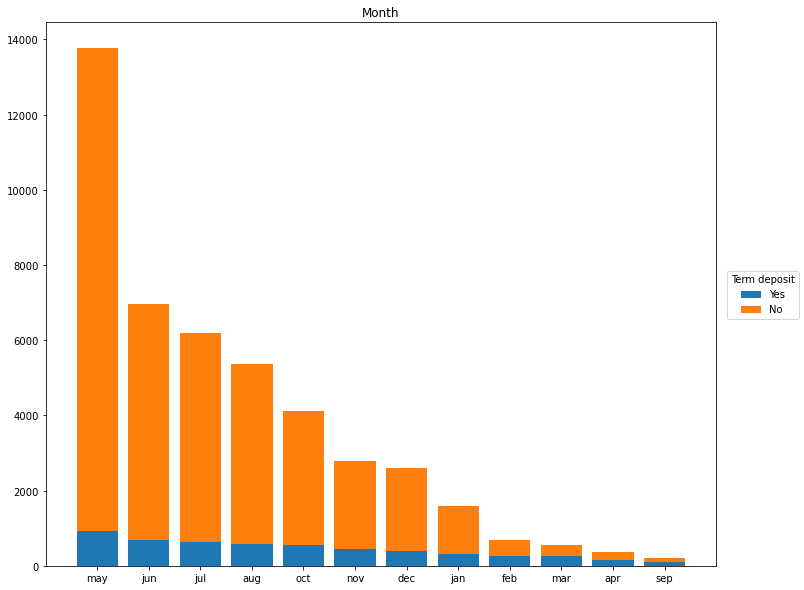

In [13]:
fig,ax=plt.subplots(figsize=(12,10))
ax.bar(data1["month"].unique(),height=data1["month"].value_counts())
ax.bar(data2["month"].unique(),height=data2["month"].value_counts(),bottom=data1["month"].value_counts())
ax.title.set_text("Month")
plt.figlegend(('Yes','No'),loc='right',title="Term deposit")
plt.show()

In [14]:
data["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [15]:
#Dividing data into input and output variable
x=data.iloc[:,0:16]
y=data.iloc[:,16]

In [17]:
x=pd.get_dummies(x)

In [18]:
x

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# logistics regression model fit
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [22]:
classifier=LogisticRegression(random_state=0,multi_class="auto",max_iter=3000)
classifier.fit(x_train,y_train)

LogisticRegression(max_iter=3000, random_state=0)

In [23]:
y_predict = classifier.predict(x_test)

In [24]:
#confusion matrix for model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test, y_predict)
print(confusion_matrix)

[[7836  171]
 [ 707  329]]


In [25]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report
print("Accuracy Score:",accuracy_score(y_test,y_predict))
print("Model Score:",classifier.score(x_test,y_test))

Accuracy Score: 0.9029083268826716
Model Score: 0.9029083268826716


In [26]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

          no       0.92      0.98      0.95      8007
         yes       0.66      0.32      0.43      1036

    accuracy                           0.90      9043
   macro avg       0.79      0.65      0.69      9043
weighted avg       0.89      0.90      0.89      9043



In [27]:
from sklearn.preprocessing import label_binarize

In [28]:
y_test=label_binarize(y_test,classes=['no','yes'])
y_predict=label_binarize(y_predict,classes=['no','yes'])

In [29]:
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


Text(0, 0.5, 'True Positive Rate')

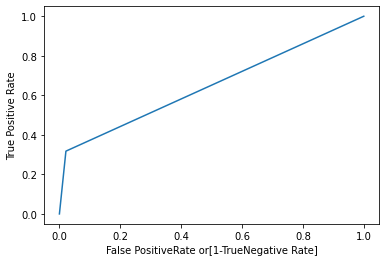

In [30]:
fpr,tpr,_=roc_curve(y_test,y_predict)
plt.plot(fpr,tpr)
plt.xlabel('False PositiveRate or[1-TrueNegative Rate]')
plt.ylabel('True Positive Rate')

In [31]:
auc=roc_auc_score(y_test,y_predict)

In [32]:
auc

0.64810562717082